In [1]:
import getting_features
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.mlab import PCA
import matplotlib as mpl

from numpy import *
import pylab

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import cross_validation
from sklearn import linear_model

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [2]:
features = np.loadtxt("features.dat", unpack=True)
response = np.loadtxt("response.dat", unpack=True)

In [3]:
X = np.transpose(np.array(features))
Y = np.array(response)

In [4]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print X.shape
print Y.shape

(1378, 595)
(1378,)


In [5]:
%matplotlib inline

# plt.figure()
# # , for x in Y use_colours[x[0]

# plt.scatter(X_r[0:49, 0],X_r[0:49, 1], c='red', s =10) #banned
# plt.scatter(X_r[50:99, 0],X_r[50:99, 1], c='blue', s =10) #unbanned

# # plt.scatter(X_r[:, 0],X_r[:, 1], c=Y, s =200, cmap=mpl.cm.gray)

# plt.title('PCA')
# plt.gray()
# plt.show()

In [6]:
# print Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 6)

# knn = KNeighborsClassifier(n_neighbors=100)
# knn.fit = (X_train, Y_train)
# Y_pred = knn.predict(X_test)
# print metrics.accuracy_score(Y_test, y_pred)
# print len(X)

# kf = cross_validation.KFold(len(X) , n_folds=2)

# print len(kf)

# print (kf)

# for train_index, test_index in kf:
#     print ("TRAIN:" , train_index, "TEST:", test_index)
#     X_train, X_test  = X[train_index], X[test_index]
#     Y_train, Y_test = Y[train_index], Y[test_index]


[[244 108]
 [136 201]]


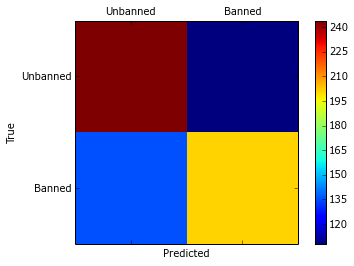

0.645863570392


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pylab as pl

logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(X_train, Y_train)


Z = logreg.predict(X_test)

labels = ['Unbanned' , 'Banned']

cm = confusion_matrix(Y_test, Z)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

print accuracy_score(Y_test, Z, normalize=True)